# **THE IMPACT OF NOISY LABELS ON SUPERVISED LEARNING PERFORMANCE**

**1. Problem Statement:**

In supervised learning, the quality of labels in the training data plays a critical role in the performance of models. However, in real-world scenarios, labels are often noisy due to human error, ambiguous data, or faulty labeling mechanisms. This project aims to investigate how different levels of label noise affect the performance of supervised learning algorithms. The objective is to simulate noisy labels on a standard dataset and evaluate the impact on classification performance using metrics like accuracy, precision, recall, and F1-score.

2. Loading Dataset and required Libraries

In [54]:
#load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv('/content/sample_data/weatherAUS.csv')
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**3. Data Cleaning**

In [55]:
#check shape and data types
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (145460, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  C

In [56]:
# Count missing values in each column
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
Sunshine,69835
Evaporation,62790
Cloud3pm,59358
Cloud9am,55888
Pressure9am,15065
Pressure3pm,15028
WindDir9am,10566
WindGustDir,10326
WindGustSpeed,10263
Humidity3pm,4507


In [57]:
# Drop high-missing columns
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
# Drop rows where RainTomorrow is NaN
df.dropna(subset=['RainTomorrow'], inplace=True)
# Fill numeric columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])



In [58]:
# Re-check if any NaNs remain
df.isnull().sum().any()


np.False_

**4.EXPLORATORY DATA ANALYSIS**

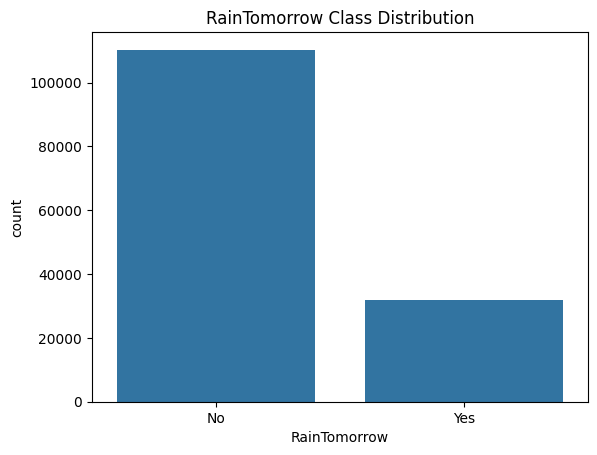

In [59]:
#1. Target Distribution (RainTomorrow)
sns.countplot(x='RainTomorrow', data=df)
plt.title('RainTomorrow Class Distribution')
plt.show()

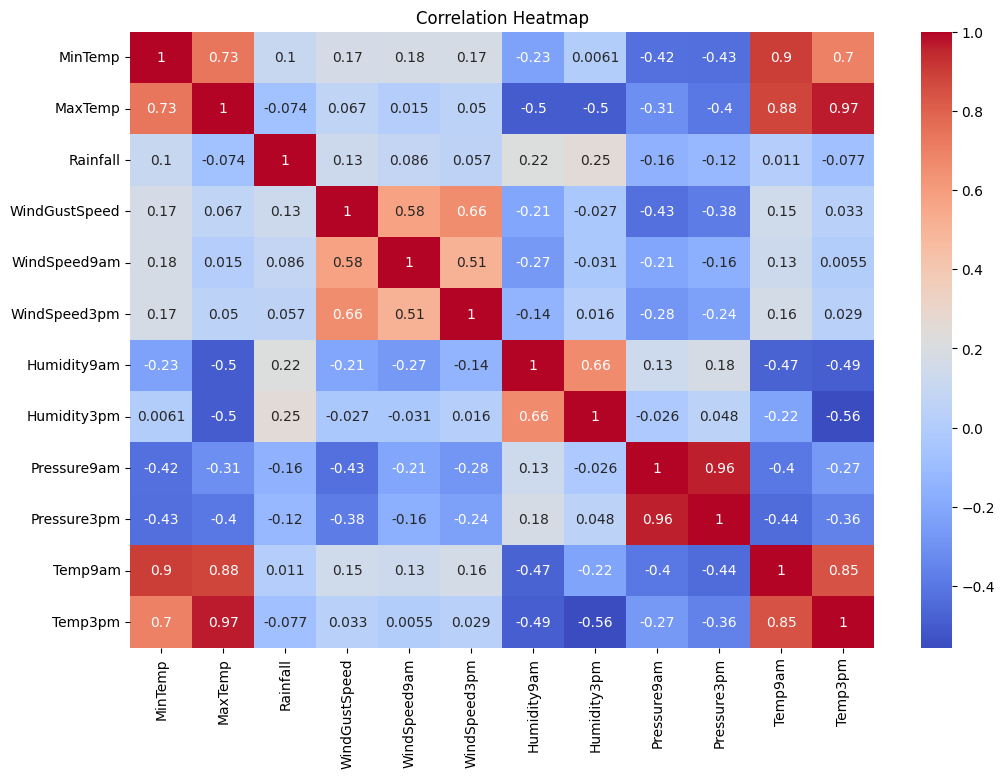

In [60]:
#2. Correlation between features
# Only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**5. Target Creation + Label Noise Injection**

In [61]:
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

def inject_label_noise(y, noise_level=0.1, random_state=42):
    np.random.seed(random_state)
    y_noisy = y.copy()
    n_samples = len(y)
    n_noisy = int(noise_level * n_samples)

    # Pick random indices to flip
    noisy_indices = np.random.choice(n_samples, n_noisy, replace=False)

    # Flip labels: 1 becomes 0, 0 becomes 1
    y_noisy.iloc[noisy_indices] = 1 - y_noisy.iloc[noisy_indices]

    return y_noisy
# Separate features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Inject 10% noise into the labels
y_noisy = inject_label_noise(y, noise_level=0.1)


In [62]:

print("Original labels distribution:")
print(y.value_counts())

print("\nNoisy labels distribution:")
print(y_noisy.value_counts())

print("\nNumber of flipped labels:", (y != y_noisy).sum())

Original labels distribution:
RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

Noisy labels distribution:
RainTomorrow
0    102443
1     39750
Name: count, dtype: int64

Number of flipped labels: 14219


**6.Train a Clean Model**

In [63]:
#Preprocess the Features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessing for numeric and categorical columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [65]:
#Train/Test Split + Build Full Pipeline
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Full pipeline with Random Forest
clf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train it
clf_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [66]:
#Evaluate the Clean Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
y_pred = clf_pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.85192868947572

Confusion Matrix:
 [[21354   710]
 [ 3501  2874]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     22064
           1       0.80      0.45      0.58      6375

    accuracy                           0.85     28439
   macro avg       0.83      0.71      0.74     28439
weighted avg       0.85      0.85      0.84     28439



**7.Train the Model on Noisy Labels**

In [67]:
#Split Noisy Labels with Features
# Reuse the same features (X), just swap target to noisy version
from sklearn.model_selection import train_test_split

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
    X, y_noisy, test_size=0.2, random_state=42, stratify=y_noisy
)


In [68]:
#Train the Same Model on Noisy Labels
# Reuse the same pipeline (preprocessor + random forest)
clf_pipeline_noisy = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train it
clf_pipeline_noisy.fit(X_train_noisy, y_train_noisy)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

In [69]:
#Evaluate the Noisy Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
y_pred_noisy = clf_pipeline_noisy.predict(X_test_noisy)

# Evaluate
print("🔸 Accuracy (Noisy Model):", accuracy_score(y_test_noisy, y_pred_noisy))
print("\n🔸 Confusion Matrix (Noisy Model):\n", confusion_matrix(y_test_noisy, y_pred_noisy))
print("\n🔸 Classification Report (Noisy Model):\n", classification_report(y_test_noisy, y_pred_noisy))


🔸 Accuracy (Noisy Model): 0.781110446921481

🔸 Confusion Matrix (Noisy Model):
 [[19512   977]
 [ 5248  2702]]

🔸 Classification Report (Noisy Model):
               precision    recall  f1-score   support

           0       0.79      0.95      0.86     20489
           1       0.73      0.34      0.46      7950

    accuracy                           0.78     28439
   macro avg       0.76      0.65      0.66     28439
weighted avg       0.77      0.78      0.75     28439



In [70]:
clean_acc = accuracy_score(y_test, y_pred)
noisy_acc = accuracy_score(y_test_noisy, y_pred_noisy)

print(f"✅ Clean Accuracy: {clean_acc:.4f}")
print(f"🧨 Noisy Accuracy: {noisy_acc:.4f}")
print(f"🔻 Accuracy Drop: {clean_acc - noisy_acc:.4f}")


✅ Clean Accuracy: 0.8519
🧨 Noisy Accuracy: 0.7811
🔻 Accuracy Drop: 0.0708


**8.Train & Compare XGBoost on Clean vs Noisy Labels**

In [71]:
from xgboost import XGBClassifier
# Pipeline for XGBoost (clean)
xgb_pipeline_clean = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train
xgb_pipeline_clean.fit(X_train, y_train)

# Predict
y_pred_xgb_clean = xgb_pipeline_clean.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ XGBoost (Clean) Accuracy:", accuracy_score(y_test, y_pred_xgb_clean))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_clean))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_clean))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost (Clean) Accuracy: 0.852737438025247

Confusion Matrix:
 [[21047  1017]
 [ 3171  3204]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22064
           1       0.76      0.50      0.60      6375

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



In [72]:
# Pipeline for XGBoost (noisy)
xgb_pipeline_noisy = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train
xgb_pipeline_noisy.fit(X_train_noisy, y_train_noisy)

# Predict
y_pred_xgb_noisy = xgb_pipeline_noisy.predict(X_test_noisy)

# Evaluate
print("🧨 XGBoost (Noisy) Accuracy:", accuracy_score(y_test_noisy, y_pred_xgb_noisy))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_noisy, y_pred_xgb_noisy))
print("\nClassification Report:\n", classification_report(y_test_noisy, y_pred_xgb_noisy))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:08:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🧨 XGBoost (Noisy) Accuracy: 0.7836773444917191

Confusion Matrix:
 [[19286  1203]
 [ 4949  3001]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86     20489
           1       0.71      0.38      0.49      7950

    accuracy                           0.78     28439
   macro avg       0.75      0.66      0.68     28439
weighted avg       0.77      0.78      0.76     28439



In [73]:
acc_clean_rf = accuracy_score(y_test, y_pred)
acc_noisy_rf = accuracy_score(y_test_noisy, y_pred_noisy)
acc_clean_xgb = accuracy_score(y_test, y_pred_xgb_clean)
acc_noisy_xgb = accuracy_score(y_test_noisy, y_pred_xgb_noisy)

print(f"📊 Random Forest (Clean): {acc_clean_rf:.4f}")
print(f"📉 Random Forest (Noisy): {acc_noisy_rf:.4f}")
print(f"📊 XGBoost (Clean): {acc_clean_xgb:.4f}")
print(f"📉 XGBoost (Noisy): {acc_noisy_xgb:.4f}")


📊 Random Forest (Clean): 0.8519
📉 Random Forest (Noisy): 0.7811
📊 XGBoost (Clean): 0.8527
📉 XGBoost (Noisy): 0.7837


**9.Visualize Model Performance (Clean vs Noisy)**

In [76]:
# Accuracy values
model_names = ['RF Clean', 'RF Noisy', 'XGB Clean', 'XGB Noisy']
accuracies = [acc_clean_rf, acc_noisy_rf, acc_clean_xgb, acc_noisy_xgb]

# Make a DataFrame for easier plotting
acc_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})


<ipython-input-77-169caaa67f58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='mako')
<ipython-input-77-169caaa67f58>:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


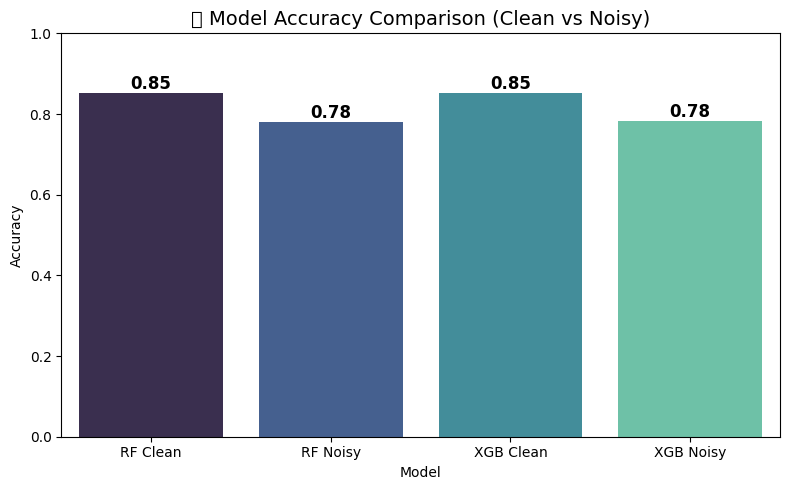

In [77]:
#plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='mako')

plt.title('📊 Model Accuracy Comparison (Clean vs Noisy)', fontsize=14)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

*The chart clearly shows that both Random Forest and XGBoost perform better on clean labels. However, XGBoost is generally more robust to noisy labels and maintains higher accuracy even when label quality degrades.*

